<div align="center">

---
# Decision Trees - ID3 [Artificial Intelligence Project]
---
</div>

<div align="center">

***
## Problem Presentation
***
</div>
    
> ADD PROBLEM PRESENTATION

<div align="center">

***
## ID3 Algorithm 
***
</div>

A well-known decision tree approach for Machine Learning is the Iterative Dichotomiser 3 (ID3) algorithm. By choosing the best characteristic at each node to partition the data depending on information gain, it recursively constructs a tree. The goal is to make the final subsets as homogeneous as possible. By choosing features that offer the greatest reduction in entropy or uncertainty, ID3 iteratively grows the tree. The procedure keeps going until a halting requirement is satisfied, like a minimum subset size or a maximum tree depth. 

The ID3 Algorithm is specifically designed for building decision trees from a given dataset. It's primary objective is to construct a tree that best explains the relationship between attributes in the data and their corresponding class labels.

**1. Selecting the Best Attribute:**
- ID3 employs the concept of entropy and information gain to determine the attribute that best separates the data. Entropy measures the impurity or randomness in the dataset.
- The algorithm calculates the entropy of each attribute and selects the one that results in the most significant information gain when used for splitting the data.

**2. Creating Tree Nodes:**
- The chosen attribute is used to split the dataset into subsets based on its distinct values.
- For each subset, ID3 recurses to find the next best attribute to further partition the data, forming branches and new nodes accordingly.

**3. Stopping Criteria:**
- The recursion continues until one of the stopping criteria is met, such as when all instances in a branch belong to the same class or when all attributes have been used for splitting.

**4. Handling Missing Values:**
- ID3 can handle missing values to prevent overfitting. While not directly included in ID3, post-processing techniques or variations like C4.5 incorporate pruning to improve the tree's generalization.

<div align="center">

***
## Mathematical Concepts of ID3 Algorithm
***
</div>

### Entropy

**Entropy** is a measure of disorder or uncertainty in a set of data. It is a tool used in ID3 to measure a dataset's disorder  or impurity. By dividing the data into as homogeneous subsets as feasible, the objective is to minimze entropy.

For a set $S$ with classes $\{c_1,\space c_2,\space ...\space,\space c_n \}$, the entropy is calculated as:

$$H(S) = \sum_{i=1}^n \space p_i \space log_2(p_i)$$

Where $p_i$ is the proportion of instances of class $c_i$ in the set.

### Information Gain

Information Gain measures how well a certain quality reduces uncertainty. ID3 splits the data at each stage, choosing the property that maximizes Information Gain. It is computes using the distinction between entropy prior to and following the split.

Information Gain measures the effectiveness of an Attribute $A$ in reducing uncertainty in set $S$

$$IG(A,S) = H(S) - \sum_{v \space \in \space values(A)} \frac{|S_v|}{|S|} \cdot H(S_v))$$

Where, $|S_v|$ is the size of the subset of $S$ for which attribute $A$ has value $v$.

### Gain Ratio (Used more in the C4.5 Algorithm)

Gain Ratio is an improvement on Information Gain that considers the inherent worth of characteristics that have a wide range of possible values. It deals with the bias of Information Gan in favor of characteristics with more pronounced values.

$$ GR(A,S) = \frac{IG(A,S)}{-\sum_{v\space\in\space values(A)} \frac{|S_v|}{|S|} \cdot log_2(\frac{|S_v|}{|S|})} $$

<div align="center">

***
## Problem's Resolution Approach
***
</div>

In order to properly develop this Project, we decided to separate it into **multiple classes**:

- **Node**:
  - Structural Data Structure used inside the ID3's algorithm.
- **Decision Tree**:
  - Class that focuses on the implementation of the ID3's Algorithm.
- **Dataset**:
  - Responsible to preprocess any given dataset. This helps to properly **format / encode the data** which is going to be later fed to the algorithm.

<div align="center">

***
## Importing Dependencies
***
</div>

In [1]:
# Remove Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None
np.random.seed(1234)

In [2]:
%load_ext autoreload
%autoreload 2
# from ID3 import (Node, DecisionTree)
from MyID3 import (DecisionTree)
from DataPreprocessing import (Dataset, Dataset_Sklearn)

<div align="center">

***
## Decision Tree - ID3 [Class]
***
</div>

> MAYBE ADD TEXT

<div align="center">

***
## Dataset [Class]
***
</div>

> MAYBE ADD TEXT

<div align="center">

***
## Model Evaluation upon the Datasets
***
</div>

___
### Restaurant Dataset
___

In [3]:
restaurant = Dataset_Sklearn('./Datasets/restaurant.csv')

In [4]:
restaurant.df

,Alt,Bar,Fri,Hun,Pat,Price,Rain,Res,Type,Est,Class
0,Yes,No,No,Yes,Some,$$$,No,Yes,French,0-10,1
1,Yes,No,No,Yes,Full,$,No,No,Thai,30-60,0
2,No,Yes,No,No,Some,$,No,No,Burger,0-10,1
3,Yes,No,Yes,Yes,Full,$,No,No,Thai,10-30,1
4,Yes,No,Yes,No,Full,$$$,No,Yes,French,>60,0
5,No,Yes,No,Yes,Some,$$,Yes,Yes,Italian,0-10,1
6,No,Yes,No,No,None,$,Yes,No,Burger,0-10,0
7,No,No,No,Yes,Some,$$,Yes,Yes,Thai,0-10,1
8,No,Yes,Yes,No,Full,$,Yes,No,Burger,>60,0
9,Yes,Yes,Yes,Yes,Full,$$$,No,Yes,Italian,10-30,0


In [5]:
restaurant.target

array([1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1])

In [6]:
x_train, x_test, y_train, y_test = restaurant.train_test_split()

In [7]:
dt = DecisionTree()
dt.fit(x_train, y_train)

In [8]:
dt.print_tree(restaurant)

 Node: Pat (IG: 0.42)
 Branch: Pat == Full
   Node: Est (IG: 0.54)
   Branch: Est == 10-30
     Leaf: Class No [1/1]
   Branch: Est == 30-60
     Leaf: Class Yes [1/1]
   Branch: Est == >60
     Leaf: Class No [2/2]
 Branch: Pat == None
   Leaf: Class No [1/1]
 Branch: Pat == Some
   Leaf: Class Yes [3/3]


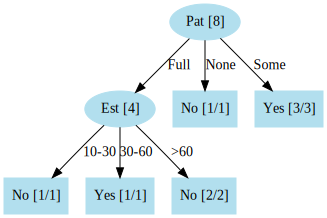

In [9]:
dt.visualize_tree(restaurant)

In [10]:
# Treino
y_pred = dt.predict(x_train)
dt.score(y_pred, y_train)

1.0

In [11]:
# Teste
y_pred = dt.predict(x_test)
dt.score(y_pred, y_test)

0.5

___
### Weather Dataset
___

In [12]:
weather = Dataset_Sklearn('./Datasets/weather.csv')

In [13]:
weather.df

,Weather,Temp,Humidity,Windy,Play
0,sunny,"(75.5, 85.0]","(74.5, 90.0]",False,0
1,sunny,"(75.5, 85.0]","(74.5, 90.0]",True,0
2,overcast,"(75.5, 85.0]","(74.5, 90.0]",False,1
3,rainy,"(69.9, 75.5]","(90.0, 96.0]",False,1
4,rainy,"(63.999, 69.9]","(74.5, 90.0]",False,1
5,rainy,"(63.999, 69.9]","(64.999, 74.5]",True,0
6,overcast,"(63.999, 69.9]","(64.999, 74.5]",True,1
7,sunny,"(69.9, 75.5]","(90.0, 96.0]",False,0
8,sunny,"(63.999, 69.9]","(64.999, 74.5]",False,1
9,rainy,"(69.9, 75.5]","(74.5, 90.0]",False,1


In [14]:
weather.target

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [15]:
x_train, x_test, y_train, y_test = weather.train_test_split()

In [16]:
dt = DecisionTree()
dt.fit(x_train, y_train)

In [17]:
dt.print_tree(weather)

 Node: Weather (IG: 0.40)
 Branch: Weather == overcast
   Leaf: Class yes [4/4]
 Branch: Weather == rainy
   Node: Windy (IG: 1.00)
   Branch: Windy == False
     Leaf: Class yes [2/2]
   Branch: Windy == True
     Leaf: Class no [1/1]
 Branch: Weather == sunny
   Leaf: Class no [2/2]


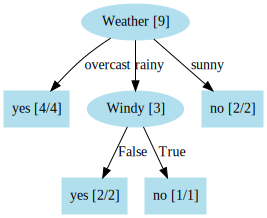

In [18]:
dt.visualize_tree(weather)

In [19]:
# Treino
y_pred = dt.predict(x_train)
dt.score(y_pred, y_train)

1.0

In [20]:
# Teste
y_pred = dt.predict(x_test)
dt.score(y_pred, y_test)

0.6

___
### Iris Dataset
___

In [21]:
iris = Dataset_Sklearn('./Datasets/iris.csv')

In [22]:
iris.df

,sepallength,sepalwidth,petallength,petalwidth,class
0,"(4.2989999999999995, 5.27]","(3.2, 4.4]","(0.999, 1.7]","(0.099, 0.4]",0
1,"(4.2989999999999995, 5.27]","(2.8, 3.2]","(0.999, 1.7]","(0.099, 0.4]",0
2,"(4.2989999999999995, 5.27]","(2.8, 3.2]","(0.999, 1.7]","(0.099, 0.4]",0
3,"(4.2989999999999995, 5.27]","(2.8, 3.2]","(0.999, 1.7]","(0.099, 0.4]",0
4,"(4.2989999999999995, 5.27]","(3.2, 4.4]","(0.999, 1.7]","(0.099, 0.4]",0
...,...,...,...,...,...
145,"(6.3, 7.9]","(2.8, 3.2]","(5.0, 6.9]","(1.8, 2.5]",2
146,"(5.27, 6.3]","(1.999, 2.8]","(1.7, 5.0]","(1.8, 2.5]",2
147,"(6.3, 7.9]","(2.8, 3.2]","(5.0, 6.9]","(1.8, 2.5]",2
148,"(5.27, 6.3]","(3.2, 4.4]","(5.0, 6.9]","(1.8, 2.5]",2


In [23]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [24]:
x_train, x_test, y_train, y_test = iris.train_test_split()

In [25]:
dt = DecisionTree()
dt.fit(x_train, y_train)

In [26]:
dt.print_tree(iris)

 Node: petallength (IG: 0.73)
 Branch: petallength == (0.999, 1.7]
   Leaf: Class Iris-setosa [33/33]
 Branch: petallength == (1.7, 5.0]
   Node: petalwidth (IG: 0.72)
   Branch: petalwidth == (0.099, 0.4]
     Leaf: Class Iris-setosa [2/2]
   Branch: petalwidth == (0.4, 1.8]
     Node: sepallength (IG: 0.03)
     Branch: sepallength == (4.2989999999999995, 5.27]
       Leaf: Class Iris-versicolor [5/6]
     Branch: sepallength == (5.27, 6.3]
       Node: sepalwidth (IG: 0.02)
       Branch: sepalwidth == (1.999, 2.8]
         Leaf: Class Iris-versicolor [13/16]
       Branch: sepalwidth == (2.8, 3.2]
         Leaf: Class Iris-versicolor [9/10]
       Branch: sepalwidth == (3.2, 4.4]
         Leaf: Class Iris-versicolor [1/1]
     Branch: sepallength == (6.3, 7.9]
       Leaf: Class Iris-versicolor [6/6]
   Branch: petalwidth == (1.8, 2.5]
     Leaf: Class Iris-virginica [3/3]
 Branch: petallength == (5.0, 6.9]
   Node: sepallength (IG: 0.09)
   Branch: sepallength == (5.27, 6.3]
     

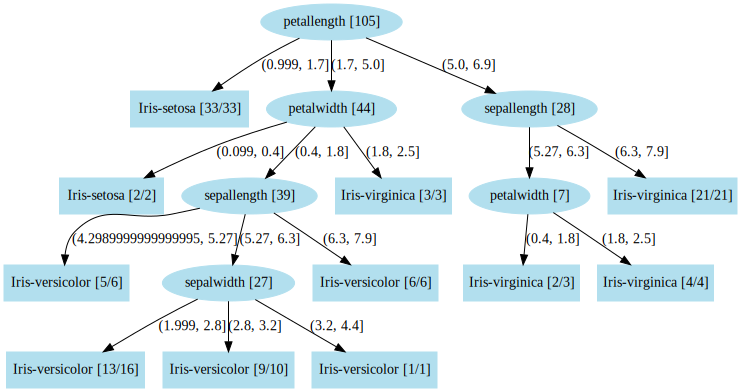

In [27]:
dt.visualize_tree(iris)

In [28]:
# Treino
y_pred = dt.predict(x_train)
dt.score(y_pred, y_train)

0.9428571428571428

In [29]:
# Teste
y_pred = dt.predict(x_test)
dt.score(y_pred, y_test)

0.9777777777777777

___
### Connect-Four Dataset 
___

In [30]:
connect4 = Dataset_Sklearn('./Datasets/connect4.csv')

In [31]:
connect4.df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,WIN
0,b,b,b,b,b,b,b,b,b,b,b,b,x,o,b,b,b,b,x,o,x,o,x,o,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,2
1,b,b,b,b,b,b,b,b,b,b,b,b,x,b,b,b,b,b,x,o,x,o,x,o,o,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,2
2,b,b,b,b,b,b,o,b,b,b,b,b,x,b,b,b,b,b,x,o,x,o,x,o,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,2
3,b,b,b,b,b,b,b,b,b,b,b,b,x,b,b,b,b,b,x,o,x,o,x,o,b,b,b,b,b,b,o,b,b,b,b,b,b,b,b,b,b,b,2
4,o,b,b,b,b,b,b,b,b,b,b,b,x,b,b,b,b,b,x,o,x,o,x,o,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67552,x,x,b,b,b,b,o,x,o,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,o,o,x,b,b,b,1
67553,x,x,b,b,b,b,o,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,o,x,o,o,x,b,0
67554,x,x,b,b,b,b,o,o,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,o,x,x,o,b,b,1
67555,x,o,b,b,b,b,o,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,o,x,o,x,x,b,0


In [32]:
connect4.target

array([2, 2, 2, ..., 1, 0, 0])

In [33]:
x_train, x_test, y_train, y_test = connect4.train_test_split()

In [34]:
dt = DecisionTree()
dt.fit(x_train, y_train)

In [35]:
# dt.print_tree(connect4)

In [36]:
# dt.visualize_tree(connect4)

In [37]:
# Treino
y_pred = dt.predict(x_train)
dt.score(y_pred, y_train)

0.923216815749963

In [38]:
# Teste
y_pred = dt.predict(x_test)
dt.score(y_pred, y_test)

0.7594730609828301

---
# REMOVE LATER

___
### Restaurant Dataset
___

In [ ]:
restaurant = Dataset(file_path='./Datasets/restaurant.csv')
print(restaurant.df.shape, "\n")
restaurant.encoded_df.head()

In [ ]:
# restaurant.data
# restaurant.target
# restaurant.features_decoders
# restaurant.cols

In [ ]:
restaurant.Estimate_Holdout()

In [ ]:
restaurant.K_Fold_CV(3, DecisionTree)

In [ ]:
(X_Train, X_Test, y_Train, y_Test) = restaurant.train_test_split(test_size=0.3)

In [ ]:
dt = DecisionTree()
dt.fit(X_Train, y_Train)
dt.print_tree(restaurant)
dt.visualize_tree(restaurant)

___
### Weather Dataset
___

In [ ]:
weather = Dataset(file_path='./Datasets/weather.csv')
print(weather.df.shape, "\n")
weather.df.head()

In [ ]:
weather.encoded_df.head()

In [ ]:
# weather.data
# weather.target
# weather.y_decoder
# weather.cols

In [ ]:
weather.Estimate_Holdout()

In [ ]:
weather.K_Fold_CV(3, DecisionTree)

In [ ]:
weather.df[["Weather", "Play"]].value_counts(normalize=True)

In [ ]:
(X_Train, X_Test, y_Train, y_Test) = weather.train_test_split(test_size=0.3)
dt = DecisionTree()
dt.fit(X_Train, y_Train)
dt.visualize_tree(weather)

In [ ]:
dt.print_tree(weather)

___
### Iris Dataset
___

In [ ]:
iris = Dataset(file_path='./Datasets/iris.csv')
print(iris.df.shape, "\n")
iris.df.head()

In [ ]:
iris.encoded_df.head()

In [ ]:
# iris.data
# iris.target
# iris.y_decoder
# iris.cols

In [ ]:
iris.Estimate_Holdout()

In [ ]:
iris.K_Fold_CV(10, DecisionTree)

In [ ]:
(X_Train, X_Test, y_Train, y_Test) = iris.train_test_split(test_size=0.3)
dt = DecisionTree()
dt.fit(X_Train, y_Train)
dt.visualize_tree(iris)

___
### Connect-Four Dataset 
___

In [ ]:
C4 = Dataset(file_path='./Datasets/connect4.csv')
print(C4.df.shape, "\n")
C4.df.head()

In [ ]:
C4.encoded_df.head()

In [ ]:
# C4.data
# C4.target
# C4.features_decoders
# C4.cols

In [ ]:
C4.Estimate_Holdout()

In [ ]:
(X_Train, X_Test, y_Train, y_Test) = C4.train_test_split(test_size=0.3)
dt = DecisionTree()
dt.fit(X_Train, y_Train)

---

<div align="center">

***
## Advantages and Disadvantages of ID3
***
</div>

### __Advantages__

- **Interpretability**: Decision Trees generated by ID3 are **easily interpretable**, making them usefull for explaining decisions to non-technical stakeholders
- **Handles Categorical Data**: ID3 can effectively **handle categorical attributes** without explicit data preprocessing steps
- **Not Computationally Expensive**: The Algorithm is relatively straightforward and **computationally less expensive** compared to some complex models

### __Disadvantages__

- **Overfitting**: ID3 tends to create complex trees that may **overfit over the training data**, impacting its performance upon new unseen information
- **Sensitive to Noise**: Noise or outliers in the data can lead to the **creation of non-optimal or incorrect splits**
- **Exclusive to Binary Trees**: ID3 only constructs **binary trees** which **limits** its ability to **express more complex relationships** within the data


<div align="center">

***
## Conclusion
***
</div>

The **ID3 Algorithm** laid the groundwork for **decision tree learning**, providing a robust framework for understanding **attribute selection** and **recursive partitioning**. Despite its limitations, ID3's simplicity and interpretability have paved the way for more sophisticated algorithms that address its drawbacks while retaining its essence.

As **Machine Learning** continues to evolve, the ID3 Algorithm remains a **crucial piece** in the mosaic of tree-based methods, serving as a stepping stone for developing **more advanced and accurate models** in the quest for **efficient data analysis and pattern recognition**.


<div align="center">

***
## Bibliographic References
***
</div>

1. Geeks For Geeks (2023). *Decision Tree Algorithms*. Available [here](https://www.geeksforgeeks.org/decision-tree-algorithms/#id3-iterative-dichotomiser-3)
2. Geeks For Geeks (2024). *Iteratice Dichotomiser 3 (ID3) Algorithm From Scratch*. Available [here](https://www.geeksforgeeks.org/iterative-dichotomiser-3-id3-algorithm-from-scratch/)

___
## Video Presentation (YouTube Video)

Moreover, you can find the **Video** for our **Project's Presentation [here](https://youtu.be/dQw4w9WgXcQ?si=NfwpqDkOwLRY6tRQ)**
___
## Final Considerations

$\quad$ If there is any difficulty on downloading or executing this project, please contact us via:

- **Email**:
    - [Gonçalo Esteves](https://github.com/EstevesX10) &#8594; `up202203947@up.pt`
    - [Maximino Canhola](https://github.com/MaximinoCanhola) &#8594; `up201909805@up.pt`
    - [Nuno Gomes](https://github.com/NightF0x26) &#8594; `up202206195@up.pt`